In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import random
from scipy.integrate import quad
from decimal import Decimal
from scipy import integrate
import math
#import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

# from matplotlib import rc
# #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

import pickle
#with open('biv_norm.pkl') as f:  # Python 2; pickle.load(f) 
with open('biv_norm.pkl', 'rb') as f: # Python 3; pickle.load(f, encoding="latin1") 
    rnd90_1, rnd90_2, rnd90_3, rnd90_4, rnd90_5, rnd50_1, rnd50_2, rnd50_3, rnd50_4, rnd50_5, rnd99_1, rnd99_2, rnd99_3, rnd99_4, rnd99_5, rnd20_1, rnd20_2, rnd20_3, rnd20_4, rnd20_5, rnd10_1, rnd10_2, rnd10_3, rnd10_4, rnd10_5, rnd30_1, rnd30_2, rnd30_3, rnd30_4, rnd30_5, rnd40_1, rnd40_2, rnd40_3, rnd40_4, rnd40_5, rnd60_1, rnd60_2, rnd60_3, rnd60_4, rnd60_5, rnd70_1, rnd70_2, rnd70_3, rnd70_4, rnd70_5, rnd80_1, rnd80_2, rnd80_3, rnd80_4, rnd80_5, rnd95_1, rnd95_2, rnd95_3, rnd95_4, rnd95_5 = pickle.load(f, encoding="latin1") 
    
#jupyter nbconvert Variation_maintained_summary_2020_3.4.ipynb

In [30]:
# from IPython.core.display import HTML
# HTML("""
# <style>
# .output_png {
#     display: table-cell;
#     text-align: center;
#     vertical-align: middle;
# }
# </style>
# """)


In [155]:
//%%javascript
//MathJax.Hub.Config({ TeX: { equationNumbers: { autoNumber: "AMS" } } });

// MathJax.InputJax.TeX.resetEquationNumbers(); 


SyntaxError: invalid syntax (<ipython-input-155-37629a5813bd>, line 1)

# Single-locus sex-specific selection: variation maintained and gender load

## Summary

In this study we analyse the evolutionary consequences, focussing on variation maintained and sex-specific fitness cost (gender load) of sex-specific selection acting on single loci. Concretely, we argue that:

1. With weaker selection both (1) the space for which (both __allelic and phenotypic__) __variation__ is __maintained__ and the (2) amount of variation maintained are reduced.
    - While current theoretical analyses already conclude point (1), point (2) was not formally proposed before and is relevant for the empirical detection of variation maintained due to sex-specific selection: with weakernot only the conditions for weaker sex-specific selection to maintaine variation are more limited, but also this variation is smaller and therefore more difficult to practically detect.
    - We check theoretical expectations against studies that have experimentally measured variation maintained by sexual conflict.
    

2. __Gender load__ is an unevoidable consequence of sex-specific selection
    - We propose a theoretical framework to quantify gender load.
    - We separately quantify the gender load associated with (1) standing variation and (2) fixed mutations. 
    - We review the experimental evidence for gender load and relate it to our theoretical expectations. 
     
     
3. Some extensions are useful (depending on the narrative, might be included into 1 and 2 directly):
    - __Flux of mutations__: quantify the overall variation and gender load contributed by a flux of mutations passing through the population.
    - Average over a __distribution of selection coefficients__: use available knowledge to estimate variation maintained and gender load across sensible, data-supported estimates of sex-specific selection coefficients, rather than all potential parameter space.
    
    
4. It takes long (see results?) for sexual conflict to resolve, so most instances of sexual conflict are expected to be unresolved and analyses need to consider off-steady state dynamics (like the flux of mutations).
    - The __timeframe of single-locus sexual conflict resolution__ agrees (or not) with empirical estimates. 

## Introduction

Sexual conflict, whereby mutations shared across sexes are subject to sex-specific selective pressures, is an extended phenomenon (references of empirical evidence), but we do not yet fully understand what its short (intra-population variation) and long (evolutionary) consequences are, as well as its impact on fitness.

Several classical theoretical studies have characterised the variation maintained by sexual conflict (Kidwell et a. 1976; Rice, 1984), finding that SA-mediated balancing selection maintains significantly higher levels of genetic variation than other processes such as mutation-selection balance, but at very small range of parameter conditions (i.e. for symmetric sex-specific selection coefficients) that becomes narrower with smaller, more realistic selection coefficients.

More recent studies have extended the classical deterministic approach by simultaneously considering SA selection, mutation and drift (Connallon & Clark, 2012; Mullon et al., 2012; Connallon & Clark, 2013). These conclude that genetic drift profoundly affect the statistical frequency distributions of antagonistically selected alleles: weaker selection not only reduces the parameter space for SA-balancing selection, but also the magnitude of variation maintained. Practically, this means that the “efficacy” of antagonistic selection (i.e., its tendency to dominate over genetic drift) is extremely weak (Connallon & Clark, 2012).

However, this is in stark contrast with empirical evidence of widespread genetic and phenotipic sexually-antagonistic variation (references), which models of variation maintained at equilibrium can only explain by unrealistically high selection coefficients. Two hypotheses account for the disagreement between the theoretical and empirical observations. On the one hand, it can be that empirical signals of SA-driven balancing selection signatures are noise, likely generated by drift (Connallon & Clark, 2012). On the other hand, models of variation at equilibrium conditions might not be appropriate to capture the contribution of SA mutations. Indeed, previous theoretical studies find that SA selection leads to much longer evolutionary timescales of partial sweeps, and drastically weaker hitchhiking effects than non-antagonistic selection (Mullon et al., 2012; Connallon & Clark, 2013). This suggests that while strong population genetic signatures of recent balancing selection are more likely to be generated by classic, nonantagonistic mechanisms, such as overdominance and negative frequency-dependent selection, sexually-antagonistic mutations are expected to persist for longer times in the population and contribute more to additive genetic variance for fitness during their lifetime (Connallon & Clark, 2013).

To this end, we define models that aim to characterize the total __genetic and phenotypic__ variation contributed by sexually-antagonstic vs nonantagonistic mutations not only at equilibrium, but while they are sweeping through the population. We hypothesize that SA mutations have a larger contribution to total variation due to their longer persistence times. 

Another issue with most current models is that they consider the entire parameter space of sex-specific selection coefficients and intersex correlations of mutations. However, both theoretical (2-sex extension of FGM; Simons et al. 2018) and empirical (Sharp and Agrawal 2008; Mallet et al. 2011; Mallet et al. 2012; Kimber and Chippindale 2013; Sharp and Agrawal 2013) estimates suggest that they [follow specific distributions]. We derive theoretical expectations considering evidence-informed sex-specific selection coefficients distribution, which is more useful when trying to interpret the empirical patterns. 

Such an approach might help reconciling theoretical expectations with empirical observations, and might provide useful insights into the yet open question of whether sexual antagonism is an evolutionary persistent (Hill et al., 2017; Ruzicka et al., 2019) or transient (high turnover and evolutionary rates of sex-bias genes, REFS) phenomenon.


---

[I don't know if this fits here or should be in a separate manuscript.]

Another intriguing question with empirical relevance regards the _cost_ of sex-specific selection, or gender load, which refers to the reduction in fitness with respect to the optimum due to sex-specific selection. While explicitly quantifying gender load is challenging, because sex-specific optima are often unknown, several studies have empirically provided evidence of the costs of sexual conflict in overall fitness (REFS). However, currently we lack a formal definition of gender load, as well as theoretical expectations of its interaction with sexual conflict and sexual dimorphism evolution. Here provide a specific definition of gender load and:

i) quantify it across a range of sex-specific selection coefficients using both deterministic and stochastic models. As empirical studies suggest, we argue that gender load is an inevitable consequence of sexual conflict, and can be associated with both standing variation within populations as well as fixed mutations (which can be detected via interpopulation crosses, REFS).

ii) analyse how gender load evolves interacts with sexual conflict over time since:

- if sexual conflict is prevalent and many mutations with sex-specific deleterious effects are being fixed, then the phenotypic mean of the population should shift away from the optimum of both sexes over time.
- if the population is far from its optimum, then sexual conflict is less likely. 


## Methods

### Definition of the model

We consider an additive diploid locus with two alleles: $1$, subject to sex-specific selection, and $0$, monomorphic (Kidwell et al., 1977; Rice,1984). Fitness of genotypes $\{11:10:00\}$ correspond to $\{1+s_f:1+\frac{1}{2}s_f:1\}$ and $\{1+s_m:1+\frac{1}{2}s_m:1\}$ in females and males, respectively.

Mutation to $0$ and $1$ occurs at rates $\mu_0$ and $\mu_1$, respectively. By assuming weak selection and mutation, we can define an allele frequency gradient as the sum of the two effects (Morrow and Connallon, 2013). Equation (1): 

$$\frac{\partial p}{\partial t}=\frac{\partial_{sel} p}{\partial t}+\frac{\partial_{mut} p}{\partial t}=
\frac{pq}{4} \Big(\frac{s_f}{1+s_fp}+ \frac{s_m}{1+s_mp} \Big)+\mu_1(1-p)-\mu_0p$$

By assuming that the population size is limited to $2N$, we can extend the currently-existing model by including drift. The distribution of allele frequencies along time, $\frac{\partial P(p,t)}{\partial t}$, can be computed using the forward Kolmogorov equation (FKE), with average allele frequency change ($a(p)$, 'bias') corresponding to equation (1) and increase in allele frequency variance ('diffusion') equal to $b(p)=\frac{p(1-p)}{2N_e}$, where $N_e=N$ with equal sex ratio $N_f=N_m=\frac{1}{2}N$, or $N_e=\frac{4N_fN_m}{N_f+N_m}$ otherwise (derivation in some Appendix).

### Variation at equilibrium

#### Heterozygosity (allelic variance)

Without drift, allele frequency at equilibrium, $\hat p$, can be calculated by setting $\frac{\partial p}{\partial t}=0$ in equation (1). By considering only selection (mutation is comparatively negligible), we find that $\hat{p}=\frac{-(s_f+s_m)}{2s_fs_m}$ (Kidwell et al., 1977). This equilibrium exists in the conditions that define it between zero and one: $0\leq\frac{-(s_f+s_m)}{2s_fs_m}\leq1$ (conditions for protected polymorphism). 

When considering drift, equilibrium allele frequency distribution (by solving the FKE for $\frac{\partial P(p,t)}{\partial t}=0$) corresponds to the 2-sex extension of Wright (1938) stationary distribution:

$$\Psi(p)=C p^{4N_e\mu_1-1} q^{4N_e\mu_0-1} \bar{W}^{2N_e} = C p^{4N_e\mu_1-1} q^{4N_e\mu_0-1} [(1+s_fp)(1+s_mp)]^{N_e}$$

where  $\bar{W}$ is the geometric mean of average fitnesses of both sexes, $\bar{W}= \sqrt{\bar{W}_f \bar{W}_m}$, and $C$ is a normalizing constant so that $\int_0^1 \Psi(p) dp =1$. Heterozygosity at equilibrium can be computed as $2E[p(1-p)]=2\int_0^1p(1-p) \Psi(p) dp$.

##### Reparametrisation 

We can approximate $\bar{W}^{2N_e}=[(1+s_fp)(1+s_mp)]^{N_e}\simeq exp\Big\{N\Big[(s_f+s_m)p - \frac{(s_f^2s_m^2)p^2}{2}\Big]\Big\}$. If $a=N(s_f+s_m)$ and $b=N(s_f^2+s_m^2)$ (and $\mu_0=\mu_1=\mu$), the allele frequency distribution can be expressed as

$$\Psi(p)=C [p(1-p)]^{4N_e\mu-1} exp\Big\{ap - \frac{bp^2}{2}\Big\}$$

Intuitively, $a$ can be understood as a measure of asymmetry of sex-specific selection and $b$ as a measure of selection strength. Results with this reparametrisation are in __Figure 1D__.


#### Phenotypic variance

We can also characterise the phenotypic variance contributed by each locus as, $V(X_i)=2s^2_jp_iq_i$.


### Gender load

The gender load is defined as the decrease in fitness with respect to the optimum due to sex-specific selection. Concretely, for sex $j$, 

$$GL_j=\frac{W_j^{opt}-\bar W_j}{W_j^{opt}}$$.

In our model, mean fitness is a function of allele frequency, $ \bar W_j(p)=1+s_jp$. At equilibrium, $ \hat p:0<\frac{-(s_f+s_m)}{2s_fs_m}<1$, and is maximised for $p=1$ when $s_j>0$ and $p=0$ when $s_j<0$, so $W_j^{opt}=1+s_j$ and $W_j^{opt}=1$, respectively, so that: 

$$GL_j = \frac{1+s_j-(1+s_j \hat p)}{1+s_j}=\frac{s_j(1-\hat p)}{1+s_j} \quad \rightarrow s_j >0$$

$$GL_j = 1-(1+s_j \hat p)=-s_j \hat p \qquad \qquad \quad \rightarrow s_j < 0$$

With this framework we can calculate the sex-specific gender load associated to each $s_f,s_m$ combination.


### Distribution of selection coefficients

Simons et al. (2018): estimate the joint distribution of frequency vs effect in GWAS.

### Out-of-equilibrium dynamics

#### Time to sexual conflict resolution

To calculate the time to loss or fixation of mutations
We can obtain the __time to loss or fixation__ using backwards Kolmogorov equation (BKE, in Appendix).

#### Flux of mutations

Kimura...

### Simulations

Describe simulation procedure.
Used to check against the analytical results. 



## Results

### Variation maintained

#### Heterozygosity

Consistently with previous studies (Kidwell et al., 1977; Rice, 1984), we find that substantial variation (heterozygosity, $H=2E[p(1-p)]$) the deterministic results suggest that the parameter space in which variation is maintained requires nearly symmetric sex-specific coefficients, and shrinks with smaller weaker selection (__Figure 1A__).
However, variation maintained by sex-specific (sexually-antagonistic) selection is much larger than what can be maintained by mutation-selection balance, so the latter is only relevant outside the scope of sex-specific selection (__Figure 1B__; Morrow and Connallon, 2013). This point is relevant in terms of disease: variants subject to sexually-antagonistic selection will disproportionately contribute to (disease) trait variance, in a sex-specific manner, in comparison to the variation maintained due to mutation-selection balance.

By additionally considering drift, we can __'quantify' the amount of variation maintained due to sex-specific selection, mutation and drift in relationship to (1) the neutral__ (only mutation and drift) __and (2) the deterministic case__ (only sex-specific selection; mutation is negligible in comparison). The results are shown in __Figure 1D__ and __Figure 2, top__.

By doing (1) we are analysing the effects of 'adding' sex-specific selection to drift. In this regard, we see that (i) sex-specific selection coefficients need to be close to symmetric, $-(s_f+s_m)\simeq 2s_fs_m$, for variation to be maintained, and that (ii) the weaker the selection (smaller $b$), the smaller the range of $a$ for which variation is maintained. This is similar to the conclusions we obtained analysing the boundary conditions with only sex-specific selection, with the addition that now we can explicitly compare variation due to sex-specific selection relative to drift for the whole parameter space. 
By doing (2), we're analysing the effects of 'adding' drift to sex-specific selection. In this case we see that the maximal variation maintained is substantially reduced when selection strength ($b$) decreases.

So, generally, we see that __our model of sex-specific selection, mutation and drift indicates that with weaker selection both (1) the space for which variation is maintained and the (2) amount of variation maintained are reduced. While current theoretical analyses already conclude point (1), point (2) was not formally proposed before and is relevant for the empirical detection of variation maintained due to sex-specific selection: not only the conditions for weaker sex-specific selection to maintaine variation are more limited, but also this variation is smaller and therefore more difficult to practically detect__. 

#### Phenotypic variance

We next __characterise the phenotypic variance contributed by each locus__, $V(X_i)=2\alpha^2_jp_iq_i$, which is the basis of what is detected using GWAS. 

The results indicate that not only the opportunities for the maintenance of phenotypic variance but also the __amount__ of variation maintained decrease with lower selection coefficients when considering drift, both in terms of heterozygosity (__Figure 2, top__) and phenotypic variance (__Figure 2, bottom__).


##### To do's on variation maintained:

* Make quantitative predictions for the conditions in which sex-specific selection (sexual conflict) can be distinguished from noise via detection of variation maintained by balancing selection, or (sex-specific) phenotypic variation in GWAS.
* Use the available knowledge on __selection coefficient distribution__ to narrow down the _potential_ parameter space to the _actual_ (see below: Distribution of selection coefficients). 
* Phenotypic variation: define predictions that can be directly linked to GWAS results, potentially using the __polygenic popgen extension or FGM__ (in Manuscript 2). One idea would be to determine under which conditions (sex-specific selection, mutation and drift) one would be able to detect genotype $\times$ sex interaction in a GWAS study , which is of practical interest. Genotype $\times$ sex can be a consequence of both asymmetric sexually-concordant selection and sexually-antagonistic selection, so this approach will englobe all types of sex-specific selection.__This can generate theoretical predictions that can be useful to interpret the results of experimental measures of sexual conflict in human (biomedical) data__, which is part of the plan.

### Gender load

Another relevant question we might ask is: what is the _fitness cost_ of sex-specific selection? The fitness cost of sex-specific selection is, technically, the __gender load__, which is defined as the decrease in fitness with respect to the optimum due to sex-specific selection. 

While gender load is considered to be an inevitable consequence of sexual conflict (eg. Arnqvist & Tuda, 2009; Bonuriansky & Chenoweth, 2009; Morrow, 2015) it is hard to quantify experimentally because it implies knowing what the optima are. Some studies identify sexual conflict by detecting sex differences in different aspects of fitness (eg. Rice, 1992,1996; Rice & Chippindale, 2002; Long et al. 2006), and call this reduction on sex-specific fitness gender load. However, an explicit definition of gender load that allows its theoretical quantification is still lacking. We define a framework that allows us to quantify the sex-specific gender load associated to each $s_f,s_m$ combination. 

Our results suggest that for large selection coefficients the extent of gender load can be very large (up to $\sim30\%$ in our case), while for weak selection it decreases substantially. However, its _cummulative effect over multiple mutations sweeping through a population_ might be considerable (see below).

We also find that there is sex-specific gender load associated to two aspects: fixation (loss) of an allele that is detrimental (favorable) to one of the sexes, and maintenance of an allele at suboptimal frequencies (outside and within in the white area in __Figure 3__, respectively, which corresponds to parameter space of __Figure 2__). The first is revealed (and can offer predictions for) when new variation is introduced in the population (eg. crossing females to a different male line, Long et al. 2006). The second is a consequence of standing variation, and can be detected within populations via within-population analyses (Rice 1992,1996) or GWAS (related to previous points). 

##### To do's on gender load:

* Determine gender load for the model with sex-specific selection, mutation and drift (so far, only selection considered). 
* Quantify gender load of many mutations sweeping through the population (see below).
* Evolution of gender load over time is not trivial, since: (1) if sexual conflict is prevalent and many mutations with sex-specific deleterious effects are being fixed, then the phenotypic mean of the population should shift away from the optimum of both sexes over time (2) if the population is far from its optimum, then sexual conflict is less likely. How do these interact? Is there a balance between the two? Are there cycles of one and then the other?
* (conceptual point) Could disease be used to quantify gender load? If we consider that disease is a suboptimal fitness state, it might offer a good opportunity to determine how much of its causes (and consequences) are associated to sexual conflict (related to previous points). _Beatriz: "I think that again the fake GWAS may be a good starting point for this - if you know you have SA, how will that be reflected in disease patterns? Then you can go to disease patterns and try to infer whether SA plays a role."_ 
* In general, check how the experimental studies define and detect gender load and define theoretical measures that are close to those, or check whether both can be related.

### Distribution of selection coefficients

(This section could be merged into the two above.)

The above results consider all theoretically possible selection coefficients ($0\leq s\leq1$). However, very large small coefficients are largely unlikely (eg. $s=0.9$ would mean that 90% of all individuals with that particular mutation die). Therefore, to be able to draw conclusions relevant to real systems, we need to consider the selection coefficient distribution to narrow down the _potential_ parameter space to the _actual_. 

For that, we can use:
- Accumulated knowledge (Nick: "we know a lot about selection coefficient distributions". Also about sex-specific selection coefficient distributions?)
- Use (2-sex) FGM to justify the __joint distribution of (sex-specific) allele frequency and effects__ (extending Simons et al., 2018). 


### Out-of-equilibrium dynamics

So far we have explored aspects associated with the equilibrium conditions, and we found that substantial amount of variation can be maintained by sexually-antagonistic selection, but only if selection coefficients are very large and if their magnitudes are very similar. It seems unrealistic to think that much variation in the genome is subject to such patterns of sexually-antagonistic selection (evidence for that. Make a stronger argument here.).

Nevertheless, not all mutations subject to sex-specific selection have reached equilibrium conditions yet, so different aspects of off-equilibrium dynamics might be worth considering: first, how long does it take to fix or lose a mutation subject to sex-specific selection or, in other workds, what is the timeframe associated to sexual conflict resolution? Second, what is the total amount of variation maintained along the time to loss or fixation of a particular mutation? This aspect gives a sense for the total amount of variation that sex-specific selection maintains, from its onset to its resolution.  

These aspects aspects can be looked into in comparison to monomorphic selection to analyse the effects of sex-specific selection. 

#### Time to sexual conflict resolution

We find that the number of generations that it takes to lose/fix the variants with $2N=1000$ is of up to one order of magnitude higher with sexually-antagonistic in relation to monomorphic selection (__Figure 4, bottom__), which suggests that a substantial amount of time is required to resolve sexual conflict, and suggests that much mutations are at out-of-equilibrium conditions, on their way to loss or fixation. 

#### Flux of mutations

The expected time $t[x]$ that an allele spends in frequency $\{x,x+dt\}$ as it passes through the population can be determined by expressing the time to fixation or loss as the integral of $t[x]$ over $x\in[0,1]$, as the allele frequency must traverse this interval before the system reaches an absorbing state. From here, one can calculate __total heterozygosity maintained__ in the process as $\int_0^1 2x(1-x)t[x]dx$ (I still have to work this out...).



---

## Figures

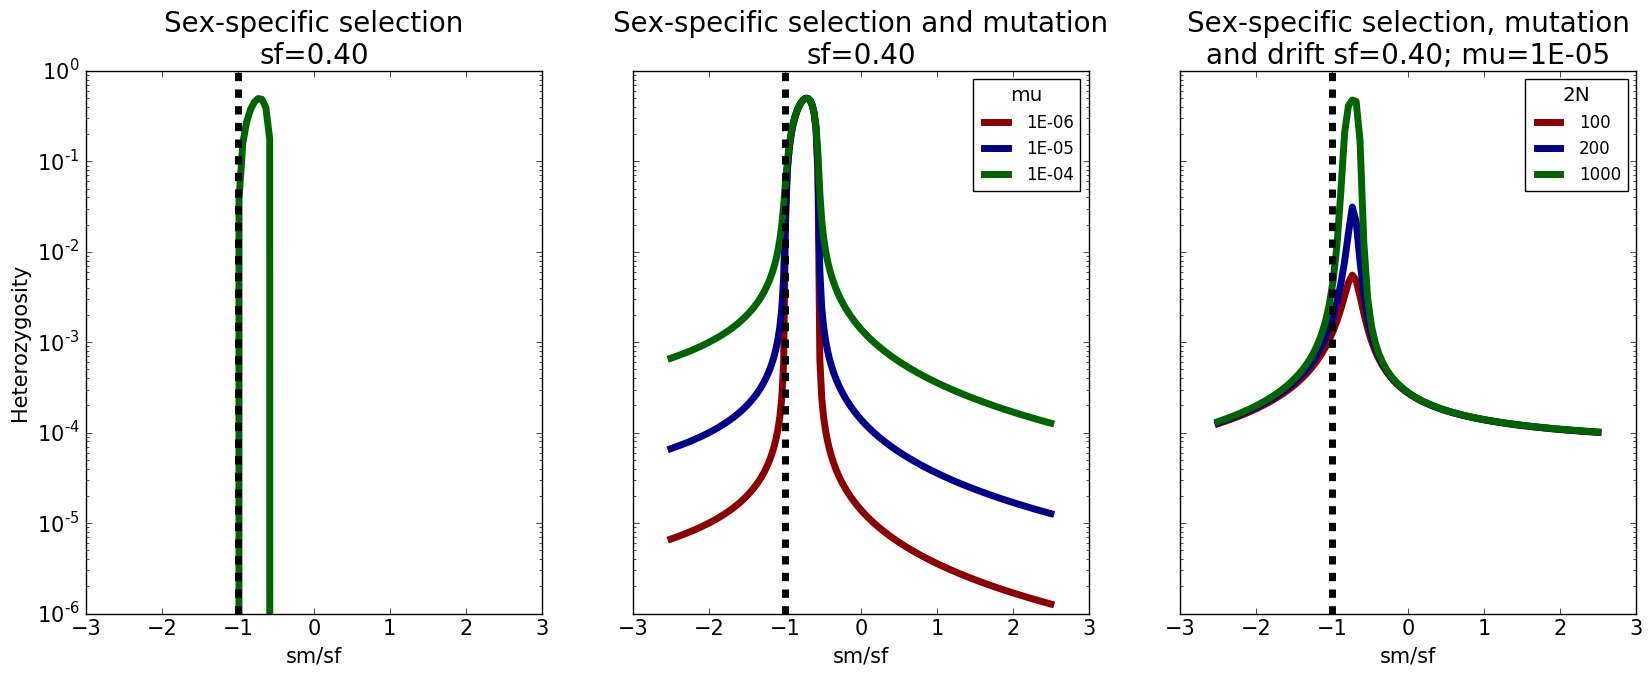

In [7]:
# selection

def p_eq(sF,sM):
    p=-(sF+sM)/(2*sF*sM) #the factor of 2 is fine, it's an haploid model 
    return p

# selection and mutation

def delta_p_selmut(p, sf, sm, mu):
    delta_p_sel=(p*(1-p)/2)*((sf+sm+2*sf*sm*p)/(1+sf*p)*(1+sm*p))
    delta_p_mut=mu*(1-2*p)
    return(delta_p_sel+delta_p_mut)

def plot_varAtEq_2(p0,sctt,mu, generations,col, ax, label_by, svar=1, lw=5, scale=0):
    sf=sctt
    sm=np.linspace(-svar, svar, 200)

    ps=[]
    for S in sm:
        p=0.5
        for i in range(generations):
            p+=delta_p_selmut(p, sf, S, mu)
        ps+=[p]
    var=2*np.array(ps)*(1-np.array(ps))
    #ax.plot(sm,ps, color=col, alpha=0.5, linewidth=5)
    if label_by=="s": 
        ax.plot(sm/sf,var, color=col, label="%.2f"%sf, linewidth=lw)
        ax.legend(loc=1, fontsize=10, title="s")
    elif label_by=="mu": 
        ax.plot(sm/sf,var, color=col, label="%.0E"%mu, linewidth=lw)
        ax.legend(loc=1, fontsize=10, title="mu")
    else:
        ax.plot(sm/sf,var, color=col, label=label_by, linewidth=lw)
    #ax.axvline(x=-1, color="black", ls="dashed")
    if scale=="log": ax.set_yscale("log")
    #ax.set_ylabel("Genetic diversity at equilibrium")
    #ax.set_xlabel("sm/sf")

# selection, mutation, drift

def distr_p (p, sf, sm, N, expP, expQ):
    #return p**(expP)*(1-p)**(expQ)*((1+sf*p)*(1+sm*p))**(N)                     #option 1
    return p**(expP)*(1-p)**(expQ)*np.exp(N*np.log((1+sf*p)*(1+sm*p)))           #option 2
    #return p**(expP)*(1-p)**(expQ)*np.exp(N*((sf+sm)*p-(sf**2+sm**2)*p**2*0.5))  #option 3

def integrate(sf, sm, N, expP, expQ, fun=distr_p):
    return quad(fun, 0, 1, args=(sf, sm, N, expP, expQ))[0]

def ep(sf, sm, N, mu, fun=distr_p):
    return integrate(sf, sm, N, 4*N*mu, 4*N*mu-1, fun)/integrate(sf, sm, N, 4*N*mu-1, 4*N*mu-1, fun)     #2N. yes, this is right, the N doesn't change

def epq(sf, sm, N, mu, fun=distr_p):
    return integrate(sf, sm, N, 4*N*mu, 4*N*mu, fun)/integrate(sf, sm, N, 4*N*mu-1, 4*N*mu-1, fun)     #2N. yes, this is right, the N doesn't change
    #return integrate(sf, sm, N, 2*N*mu, 2*N*mu, fun)/integrate(sf, sm, N, 2*N*mu-1, 2*N*mu-1, fun)      #N

#FIGURE FOR PROPOSAL

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,7), sharey=True)

cols=["darkred", "darkblue", "darkgreen"]
sm=np.linspace(-1, 1, 100)
sf=0.4

lw=5

# 1. selection

peqs=[p_eq(sM,sf) if (sM>=-sf and sM<=-sf/(1+2*sf)) else 0 if sM<-sf else 1 for sM in sm]
pqs=[2*p*(1-p) for p in peqs]
ax1.plot(sm/sf,pqs, color=cols[2], label=sf, linewidth=lw)

ax1.axvline(x=-1,color="black", ls="dashed", linewidth=lw)
ax1.set_ylabel("Heterozygosity (2pq)");
ax1.set_ylim(1e-6, 1)
ax1.set_title("Sex-specific selection\n ")

# 2. selection and mutation

plot_varAtEq_2(p0=0.5,sctt=0.4,mu=1e-6,generations=10000, col="darkred", ax=ax2, label_by="mu")
plot_varAtEq_2(p0=0.5,sctt=0.4,mu=1e-5,generations=10000, col="darkblue", ax=ax2, label_by="mu")
plot_varAtEq_2(p0=0.5,sctt=0.4,mu=1e-4,generations=10000, col="darkgreen", ax=ax2, label_by="mu")

ax2.set_xlabel("sm/sf")
ax2.set_title("Sex-specific selection and mutation\nsf=%.2f"%(sf))
ax2.axvline(x=-1,color="black", ls="dashed", linewidth=5)

# 3. selection, mutation and drift

#different population size

mu=1e-5
sf=0.4

N=[50, 100, 500]


for i in range(3):
    pq=[]; ps=[]
    for smi in sm:
        pq+=[2*epq(sf, smi, N[i], mu)]
    ax3.plot(sm/sf, pq, label=N[i]*2, color=cols[i], linewidth=lw) #2pq
  
ax3.axvline(x=-1,color="black", ls="dashed",linewidth=lw)
ax3.legend(loc=1, fontsize=9, title="N")
ax3.set_title("Sex-specific selection, mutation and drift\nsf=%.2f; mu=%.0E"%(sf,mu));


ax1.set_title("Sex-specific selection\nsf=%.2f"%(sf), fontsize=20)
ax1.set_xlabel("sm/sf", fontsize=15)
ax1.set_ylabel("Heterozygosity", fontsize=15)
ax1.tick_params(labelsize=15)

ax2.set_title("Sex-specific selection and mutation\nsf=%.2f"%(sf), fontsize=20)
ax2.set_xlabel("sm/sf", fontsize=15)
ax2.set_ylabel("", fontsize=15)
ax2.tick_params(labelsize=15)

ax3.set_title("Sex-specific selection, mutation\nand drift sf=%.2f; mu=%.0E"%(sf,mu), fontsize=20)
ax3.set_xlabel("sm/sf", fontsize=15)
ax3.set_ylabel("", fontsize=15)
ax3.tick_params(labelsize=15)

ax2.legend(loc=1, fontsize=15, title="mu",prop={'size':15})
ax3.legend(loc=1, fontsize=15, title="N", prop={'size':15})

leg = ax2.legend()
leg.set_title("mu", prop = {'size':'x-large'})
leg = ax3.legend()
leg.set_title("2N", prop = {'size':'x-large'})
ax1.set_yscale("log")

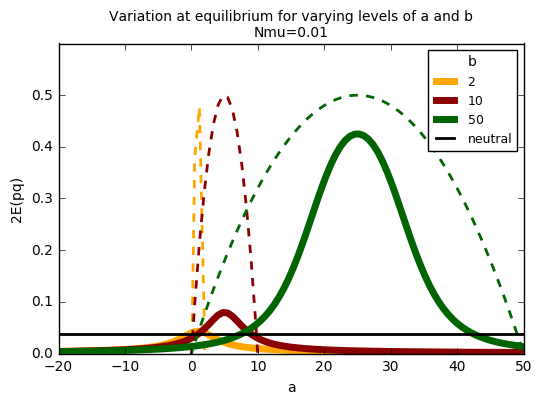

In [15]:
def distr_p_ab (p, a, b, expPQ):
    return (p*(1-p))**(expPQ)*np.exp(a*p-b/2*p**2)

def integrate_ab(a,b, expPQ, fun=distr_p_ab):
    return quad(fun, 0, 1, args=(a,b,expPQ))[0]

def epq_ab(a, b, Nmu, fun=distr_p_ab):
    return integrate_ab(a, b, 4*Nmu, fun)/integrate_ab(a, b, 4*Nmu-1, fun) 

cols=["orange", "darkred", "darkgreen", "darkblue", "purple"]
Nmu=0.01
Bs=[2, 10, 50]
As=np.linspace(-20,50,100)
for i in range(len(Bs)):
    pq=[]; pqdet=[]
    for a in As:
        pq+=[2*epq_ab(a, Bs[i], Nmu)]
        pqdet+=[2*(a/Bs[i])*(1-a/Bs[i])]
    plt.plot(As, pq, label=Bs[i], color=cols[i], linewidth=lw) #2pq
    plt.plot(As, pqdet, color=cols[i], linewidth=lw/2, linestyle="dashed")

#plt.axhline(4*Nmu/(1+8*Nmu), color="black", linewidth=lw/2, linestyle="dashed") # explicit 
plt.axhline(2*epq_ab(0,0, Nmu), color="black", linewidth=lw/2, label="neutral")#, linestyle="dashed")

plt.ylim(0,0.6)
plt.xlabel("a")
plt.ylabel("2E(pq)")
plt.title("Variation at equilibrium for varying levels of a and b\nNmu=%.2f"%(Nmu), fontsize=10)
plt.legend(loc=1, fontsize=9, title="b");#,prop={'size':15}

__Figure 1.__ Variation maintained at equilibrium with sex-specific (A) selection, (B) mutation and (C) drift. See main text for model specifications.

(D) Corresponds to variation maintained using the reparametrised equation, for varying levels of $a=N(s_f+s_m)$, $b=N(s_f^2+s_m^2)$, with $N\mu=0.01$. Horizontal black line indicates variation maintained under neutral conditions ($a=b=0$), corresponding to $2E[p(1-p)]= 2\frac{\int_0^1C [p(1-p)]^{4N_e\mu}dp}{\int_0^1C [p(1-p)]^{4N_e\mu-1}dp} \simeq \frac{4N\mu}{1+8N\mu}$. Dashed coloured lines corrrespond to variation maintained under deterministic conditions ($N \rightarrow \infty$, for each $b$), $2E[p(1-p)]\simeq 2\frac{a}{b}\Big[1-\frac{a}{b}\Big]$. This approximation holds because $\hat p=\frac{-(s_f+s_m)}{2s_fs_m} \simeq \frac{a}{b}$, since for $s_f,s_m<<1 \rightarrow s_f^2,s_m^2\sim 0$ so that $\frac{-(s_f+s_m)}{2s_fs_m}\simeq s_f+s_m=\frac{a}{N}$ and $b=N(s_f^2+s_m^2)\simeq N$. 

---

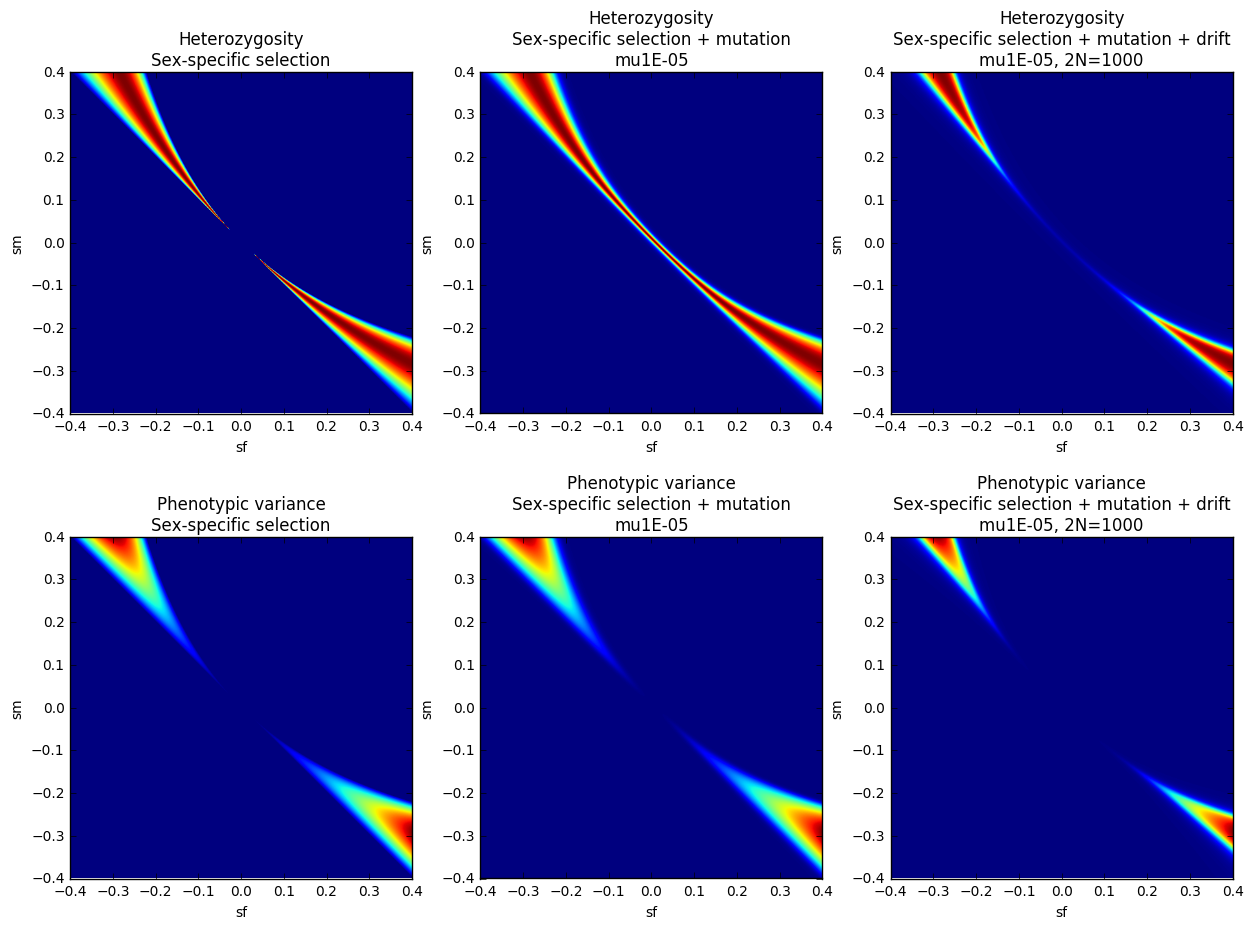

In [5]:
f, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(15,11))

generations=500
mu=1e-5
N=500

pqalls=[];pvars=[]
pqallm=[];pvarm=[]
pqalld=[];pvard=[]
for sf in np.linspace(-0.4,0.4, 500):
    pqs=[];pvs=[]
    pqm=[];pvm=[]
    pqd=[];pvd=[]
    for sm in np.linspace(-0.4, 0.4, 500):
        alpha2=0.5*(sf**2+sm**2)
        #selection
        if (sm>=-sf and sm<=-sf/(1+2*sf)): peqs=p_eq(sm,sf) 
        else: peqs=0
        pqs+=[2*peqs*(1-peqs)]
        pvs+=[pqs[-1]*alpha2]
        #mutation
        p=0.1
        for i in range(generations):
            p+=delta_p_selmut(p, sf, sm, mu)
        pqm+=[2*p*(1-p)]
        pvm+=[pqm[-1]*alpha2]
        #drift
        pqd+=[2*epq(sf, sm, N, mu)]
        pvd+=[pqd[-1]*alpha2]
    pqalls+=[pqs]; pvars+=[pvs]
    pqallm+=[pqm]; pvarm+=[pvm]
    pqalld+=[pqd]; pvard+=[pvd]

ax1.imshow(pqalls, origin="lower", extent=[-0.4,0.4,-0.4,0.4])
ax1.set_xlabel("sf")
ax1.set_ylabel("sm")
ax1.set_title("Heterozygosity\nSex-specific selection",size=12)

ax2.imshow(pqallm, origin="lower", extent=[-0.4,0.4,-0.4,0.4])
ax2.set_xlabel("sf")
ax2.set_ylabel("sm")
ax2.set_title("Heterozygosity\nSex-specific selection + mutation\nmu%.0E"%(mu),size=12)

ax3.imshow(pqalld, origin="lower", extent=[-0.4,0.4,-0.4,0.4])
ax3.set_xlabel("sf")
ax3.set_ylabel("sm")
ax3.set_title("Heterozygosity\nSex-specific selection + mutation + drift\nmu%.0E, 2N=%i"%(mu,2*N),size=12);

ax4.imshow(pvars, origin="lower", extent=[-0.4,0.4,-0.4,0.4])
ax4.set_xlabel("sf")
ax4.set_ylabel("sm")
ax4.set_title("Phenotypic variance\nSex-specific selection",size=12)

ax5.imshow(pvarm, origin="lower", extent=[-0.4,0.4,-0.4,0.4])
ax5.set_xlabel("sf")
ax5.set_ylabel("sm")
ax5.set_title("Phenotypic variance\nSex-specific selection + mutation\nmu%.0E"%(mu),size=12)

ax6.imshow(pvard, origin="lower", extent=[-0.4,0.4,-0.4,0.4])
ax6.set_xlabel("sf")
ax6.set_ylabel("sm")
ax6.set_title("Phenotypic variance\nSex-specific selection + mutation + drift\nmu%.0E, 2N=%i"%(mu,2*N),size=12);

__Figure 2.__ Heterozygosity, $H_i=2p_iq_i$, and phenotypic variance, $V_{Zi}=2s^2_jp_iq_i$, contributed by a single locus $i$ with selection, mutation and drift, at equilibrium. 

---

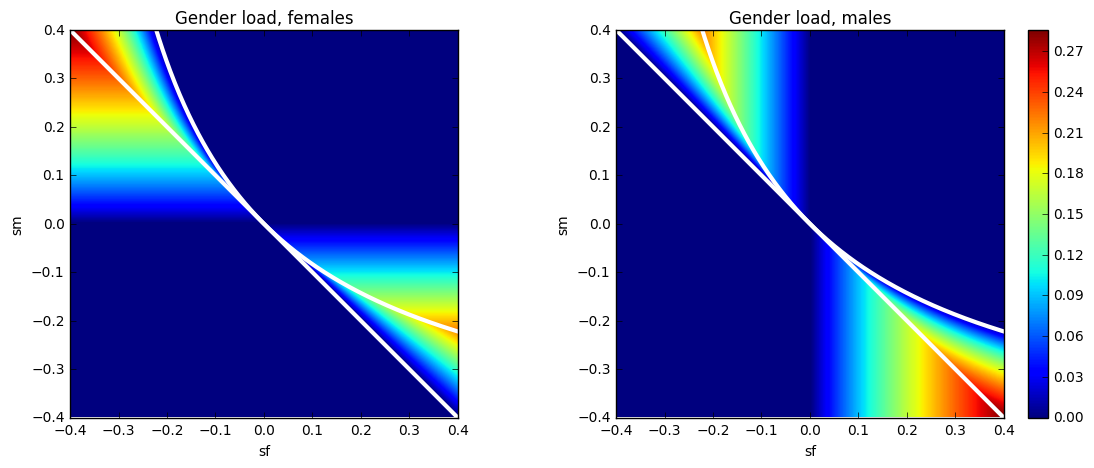

In [21]:
def p_eq(sf,sm):
    if (sm>=-sf and sm<=-sf/(1+2*sf)): return -(sf+sm)/(2*sf*sm)
    elif 0>(sf+sm): return 0
    else: return 1

def GL(sf,sm):
    peq=p_eq(sf,sm)
    if sf>0: glf=sf*(1-peq)/(1+sf)
    else: glf=-sf*peq
    if sm>0: glm=sm*(1-peq)/(1+sm)
    else: glm=-sm*peq
    return glf,glm

S=np.linspace(-0.4,0.4, 500)

glallf=[]; glallm=[]
for sf in S:
    gl=[]
    for sm in S:
        gl+=[GL(sf,sm)]
    gla=np.array(gl)
    glallf+=[gla[:,0]]
    glallm+=[gla[:,1]]

f, (ax1,ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.imshow(glallf, origin="lower", extent=[-0.4,0.4,-0.4,0.4])
ax1.set_xlabel("sf")
ax1.set_ylabel("sm")
ax1.set_title("Gender load, females",size=12)
ax1.plot(S,-S, color="white", linewidth=3)
ax1.plot(S,-S/(1+2*S), color="white", linewidth=3)
ax1.set_xlim(-0.4,0.4)
ax1.set_ylim(-0.4,0.4)

meh=ax2.imshow(glallm, origin="lower", extent=[-0.4,0.4,-0.4,0.4])
ax2.set_xlabel("sf")
ax2.set_ylabel("sm")
ax2.set_title("Gender load, males",size=12);
ax2.plot(S,-S, color="white", linewidth=3)
ax2.plot(S,-S/(1+2*S), color="white", linewidth=3)
ax2.set_xlim(-0.4,0.4)
ax2.set_ylim(-0.4,0.4)
f.colorbar(meh, ax=ax2);

__Figure 3.__ Sex-specific gender load, computed as $GL_j=\frac{W_j^{opt}-\bar W_j}{W_j^{opt}}$ for sex $j$ for an additive allele under sex-specific selection (see main text for details).

---

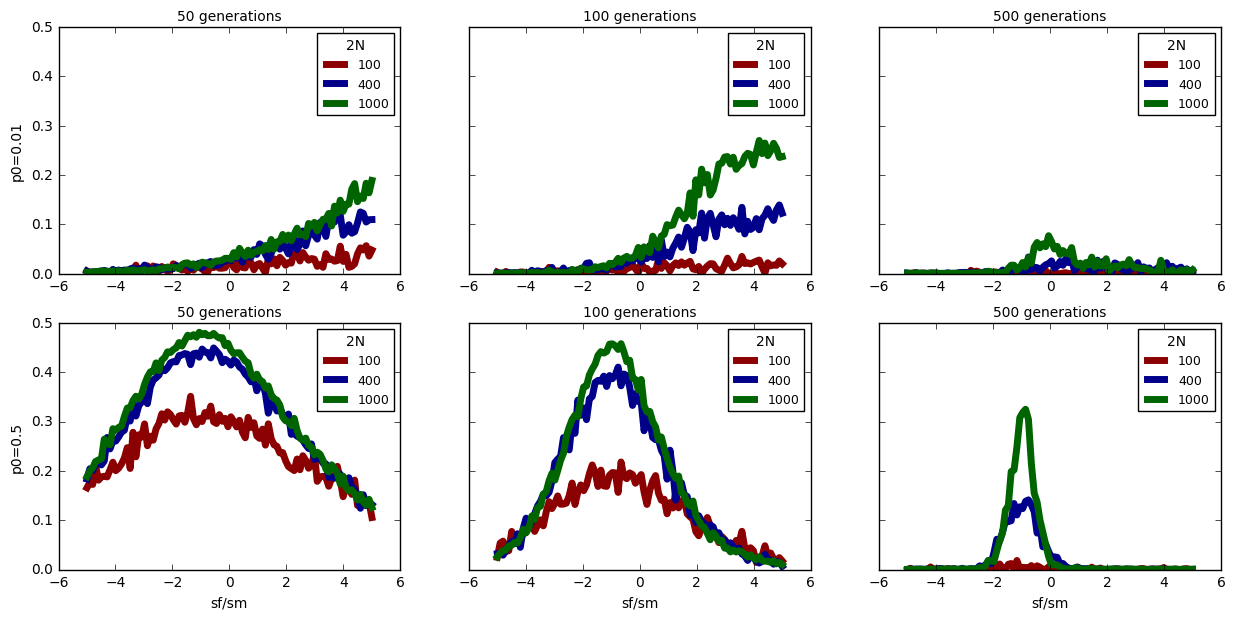

In [17]:
#this keeps all P trajectories as simulation goes forward

def iteratestoch(p0,N,sf,sm,mu1,mu0,generations):
    P=[p0]
    for gen in range(1,generations):
        ap=0.25*P[-1]*(1-P[-1])*(sf/(1+sf*P[-1])+sm/(1+sm*P[-1]))+mu1*(1-P[-1])-mu0*P[-1]
        p=P[-1]+ap
        Ngen=np.random.binomial(2*N,p)
        P+=[Ngen/float(2*N)]
    return P

def plotEmpiricalDistr(p,N,sf,sm,mu1,mu0,generations, ax, xlab="", ylab="", tit=""):
    
    #simulate
    traj=[]
    for rep in range(1000):
        traj+=[iteratestoch(p,N,sf,sm,mu1,mu0,generations)]
    
    #empirical allele frequency distribution
    #ax.hist(np.array(traj).T[-1],50,normed=1, color="darkgreen", alpha=0.5);
    sns.kdeplot(np.array(traj).T[-1], ax=ax)
    ax.set_xlim(0,1)

    ax.set_title(tit)#"Stationary distribution (sf=%1.2f, sm=%1.2f, 4Nmu=%1.1f)"%(sf,sm,4*N*mu),size=10)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)

#this updates P as simulation goes forward -> USED

def iteratestoch_onlylast(p0,N,sf,sm,mu1,mu0, generations, heterozygosity=False):
    P=p0
    for gen in range(1,generations):
        ap=0.25*P*(1-P)*(sf/(1+sf*P)+sm/(1+sm*P))+mu1*(1-P)-mu0*P
        p=P+ap
        Ngen=np.random.binomial(2*N,p)
        P=Ngen/float(2*N)
    if heterozygosity == True: return 2*P*(1-P)
    else: return P

def averageH_replicates(p0,N,sf,sm,mu1,mu0,generations,replicates):
    reps=[]
    for i in range(replicates):
        reps+=[iteratestoch_onlylast(p0,N,sf,sm,mu1,mu0, generations, heterozygosity=True)]
    return(np.mean(reps))

def plot_meanH_atT(p0, gen, repl, ax, tit="", xlab="", ylab=""):

    sf=0.04
    sm=np.linspace(-0.2,0.2,100)
    cols=["darkred", "darkblue", "darkgreen"]
    lw=5

    Nis=[50,200,500]
    for ii in range(len(Nis)):
        meanH=[]
        for i in range(len(sm)):
            meanH+=[averageH_replicates(p0=p0, N=Nis[ii], sf=sf, sm=sm[i], mu1=1e-5, mu0=1e-5, generations=gen, replicates=repl)]
        ax.plot(sm/sf, meanH, color=cols[ii], label=2*Nis[ii], linewidth=lw)

    ax.legend(loc=1, fontsize=9, title="2N")
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(tit,fontsize=10)
    #ax.set_yscale("log")


f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(15,7), sharey=True)#

#f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4), sharey=True)

plot_meanH_atT(p0=0.01, gen=50, repl=100, ax=ax1, ylab="p0=0.01", tit="50 generations")
plot_meanH_atT(p0=0.01, gen=100, repl=100, ax=ax2, tit="100 generations")
plot_meanH_atT(p0=0.01, gen=500, repl=100, ax=ax3, tit="500 generations")
plot_meanH_atT(p0=0.5, gen=50, repl=100, ax=ax4, xlab="sf/sm", ylab="p0=0.5", tit="50 generations")
plot_meanH_atT(p0=0.5, gen=100, repl=100, ax=ax5, xlab="sf/sm", tit="100 generations")
plot_meanH_atT(p0=0.5, gen=500, repl=100, ax=ax6, xlab="sf/sm", tit="500 generations")

#f.suptitle("Mean heterozygosity")

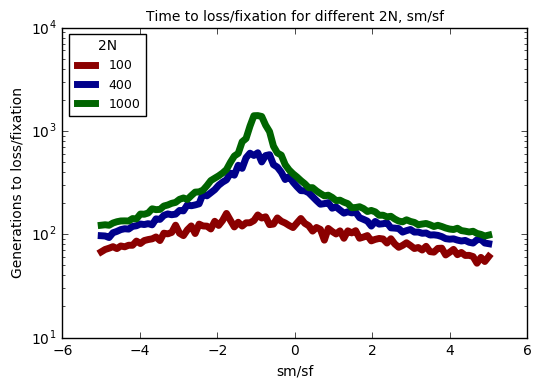

In [18]:
def iteratestoch_time(p0,N,sf,sm,mu1,mu0):
    P=p0
    t=0
    while P > 1e-6 and P < 0.999999:
        t+=1
        ap=0.25*P*(1-P)*(sf/(1+sf*P)+sm/(1+sm*P))+mu1*(1-P)-mu0*P
        p=P+ap
        Ngen=np.random.binomial(2*N,p)
        P=Ngen/float(2*N)
        #if P < 1e-6 or P > 0.999999: break
    return t

def plotDistrTimeLossFix(p,N,sf,sm,mu1,mu0, ax, xlab="", ylab="", tit=""):
    
    #simulate
    traj=[]
    for rep in range(1000):
        traj+=[iteratestoch_time(p,N,sf,sm,mu1,mu0)]
    
    #empirical allele frequency distribution
    #ax.hist(traj)#,50,normed=1, color="darkgreen", alpha=0.5);
    sns.kdeplot(traj, ax=ax)
    #ax.set_xlim(0,1)

    ax.set_title(tit)#"Stationary distribution (sf=%1.2f, sm=%1.2f, 4Nmu=%1.1f)"%(sf,sm,4*N*mu),size=10)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    
#plotDistrTimeLossFix(p=0.5,N=10,sf=0.1,sm=-0.1,mu1=1e-4,mu0=1e-4, ax=ax1)

def averageT_replicates(p0,N,sf,sm,mu1,mu0, replicates):
    reps=[]
    for i in range(replicates):
        reps+=[iteratestoch_time(p0,N,sf,sm,mu1,mu0)]
    return(np.mean(reps))


# plot

cols=["darkred", "darkblue", "darkgreen"]
Nis=[50, 200,500]
lw=5

sf=0.04
sm=np.linspace(-0.2,0.2,100)

for ii in range(len(Nis)):
    meanT=[]
    for i in range(len(sm)):
        meanT+=[averageT_replicates(p0=0.5, N=Nis[ii], sf=sf, sm=sm[i], mu1=1e-5, mu0=1e-5, replicates=100)]
    plt.plot(sm/sf, meanT, color=cols[ii], label=2*Nis[ii], linewidth=lw)
    
plt.legend(loc=2, fontsize=9, title="2N")
plt.xlabel("sm/sf")
plt.ylabel("Generations to loss/fixation")
plt.yscale("log")
plt.title("Time to loss/fixation for different 2N, sm/sf",fontsize=10);

__Figure 4. Variation maintained along time__  (top, middle) and __time to loss/fixation__ (bottom) of alleles subject to sex-specific selection, mutation and drift for different ratios of sex-specific selection coefficients $s_m/s_f$ and population sizes. For both, displayed is average across 100 replicated simulations, $s^f=0.04$ and $s^m\in [-0.2,0.2]$.

_For top, Nick: "what are the units on the y axis? How do we tell whether this load is large or small?"_

---

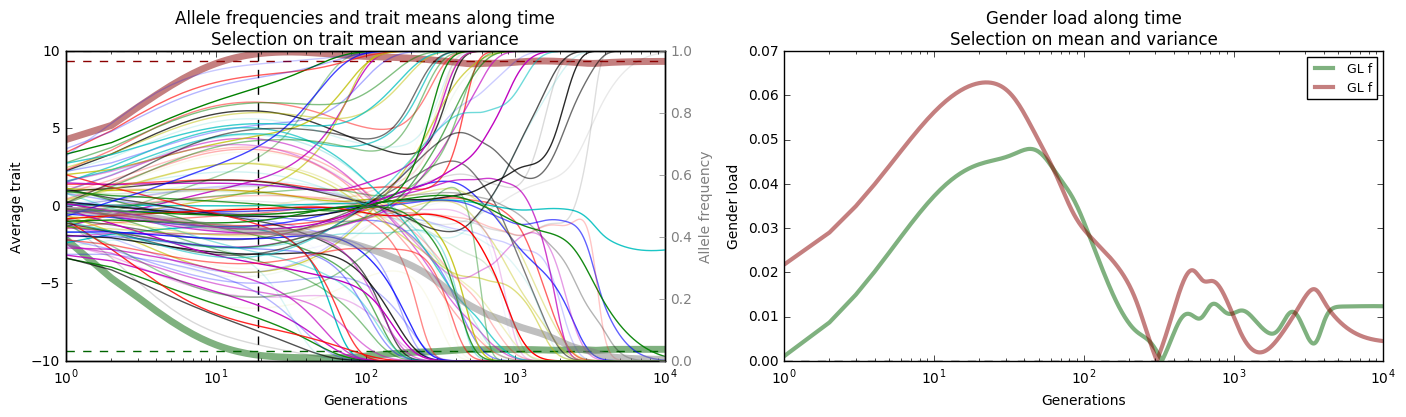

In [16]:
def delta_p_quad_2sex (p, s, z_avg_F, z_avg_M, z_opt_F, z_opt_M, a_f, a_m, selonvar):
    def dlogWdp (p, s, z_avg, z_opt, a, selonvar):
        if selonvar==0: return (-s)*(z_avg-z_opt)*a
        elif selonvar==1: return (-s)*(z_avg-z_opt)*a-0.5*s*a**2*((1-p)-p)
    dlogWdp_F=dlogWdp(p,s,z_avg_F, z_opt_F, a_f, selonvar)
    dlogWdp_M=dlogWdp(p,s,z_avg_M, z_opt_M, a_m, selonvar)
    return p*(1-p)*(0.5*(dlogWdp_F+dlogWdp_M))

def delta_z_quad_2sex(p, s, z_avg_F, z_opt_F, z_avg_M, z_opt_M, a_f, a_m):
    Vg_f=sum(a_f**2*p*(1-p))
    Vg_m=sum(a_m**2*p*(1-p))
    Vg_fm=sum(a_m*a_f*p*(1-p))
    beta_f=(-s)*(z_avg_F-z_opt_F)
    beta_m=(-s)*(z_avg_M-z_opt_M)
    Vg=np.array([[Vg_f,Vg_fm],[Vg_fm,Vg_m]])
    beta=np.array([beta_f,beta_m])
    return 0.5*np.dot(beta,Vg)

def plot_selresponse_2sexes(a_f, a_m, ps, rel_opt_F, rel_opt_M, s, AX, generations, n_loci,selonvar, tit=""):
    
    ps=[ps]
    z_avg_F=[sum(ps[-1]*a_f)]
    z_avg_M=[sum(ps[-1]*a_m)]
    z_avg=sum(ps[-1]*(0.5*(a_f+a_m)))
    
    z_opt_F=z_avg*rel_opt_F
    z_opt_M=z_avg*rel_opt_M
#     z_opt_F=rel_opt_F
#     z_opt_M=rel_opt_M

    for g in range(generations):
        ps+=[ps[-1]+delta_p_quad_2sex(ps[-1], s, z_avg_F[-1], z_avg_M[-1], z_opt_F, z_opt_M, a_f, a_m, selonvar)]
        z_avg_F+=[sum(ps[-1]*a_f)]
        z_avg_M+=[sum(ps[-1]*a_m)]

    ax11 = AX.twinx()
    ax11.axhline(y=1, color="grey", ls="dashed")
    [ax11.plot(range(generations+1),np.array(ps)[:,i],alpha=np.mean(a_f[i]+ a_m[i])) for i in range(n_loci)] #THIS IS NOT GOOD
    ax11.set_ylabel('Allele frequency', color='grey')
    ax11.tick_params('y', colors='grey')
    #ax11.set_xlim(xmin=0.99)
    ax11.set_ylim((0,1))
    ax11.set_xlabel("Generations")
    ax11.set_title(tit)

    het=[np.mean(2*i*(1-i)) for i in np.array(ps)]
    ax11.plot(range(generations+1), het, color="grey", linewidth=5, alpha=0.5,label="2pq")


    AX.axhline(y=z_opt_F, color="darkgreen", ls="dashed", label="Z_opt_F")
    AX.axhline(y=z_opt_M, color="darkred", ls="dashed", label="Z_opt_M")
    AX.plot(range(generations+1),z_avg_F, color="darkgreen", linewidth=5, alpha=0.5, label="Z_avg_F")
    AX.plot(range(generations+1),z_avg_M, color="darkred", linewidth=5, alpha=0.5, label="Z_avg_M")
    AX.set_xlabel("Generations")
    AX.set_ylabel("Average trait")
    #AX.set_title("Evolution of trait means")
    AX.set_xscale("log")
    AX.set_xlim(xmin=0.99,xmax=generations)

    h1, l1 = AX.get_legend_handles_labels()
    h2, l2 = ax11.get_legend_handles_labels()
    #AX.legend(h1+h2, l1+l2, loc=3, fontsize=9)

def time_to_OptSD(a_f, a_m, ps, rel_opt_F, rel_opt_M, s, selonvar):
    z_avg_F=sum(a_f*ps)
    z_avg_M=sum(a_m*ps)
    z_avg=sum((0.5*(a_f+a_m))*ps)
    z_opt_F=z_avg*rel_opt_F
    z_opt_M=z_avg*rel_opt_M
    for g in range(10000):
        ps+=delta_p_quad_2sex(p=ps, s=s, z_avg_F=z_avg_F, z_avg_M=z_avg_M, z_opt_F=z_opt_F, z_opt_M=z_opt_M, a_f=a_f, a_m=a_m, selonvar=selonvar)
        z_avg_F_prev=z_avg_F
        z_avg_M_prev=z_avg_M
        z_avg_F=sum(ps*a_f)
        z_avg_M=sum(ps*a_m)
        if selonvar==0: 
            #if (abs(z_avg_F-z_opt_F)<1e-2): print g, "F"
            #if (abs(z_avg_M-z_opt_M)<1e-2): return g, "M"
            if (abs(z_avg_F-z_opt_F)<1e-1 and abs(z_avg_M-z_opt_M)<1e-1): return g, ps
        if selonvar==1:
            if (z_avg_F-z_opt_F)*(z_avg_F_prev-z_opt_F)<0: print g, "F", z_avg_F, z_opt_F #return g,ps,"F"
            if (z_avg_M-z_opt_M)*(z_avg_M_prev-z_opt_M)<0: print g, "M", z_avg_M, z_opt_M #return g,ps, "M"

def genderLoad_selVar(a_f, a_m, ps, rel_opt_F, rel_opt_M, s, generations):
    z_avg=sum((0.5*(a_f+a_m))*ps)
    z_opt_F=z_avg*rel_opt_F
    z_opt_M=z_avg*rel_opt_M
    #count from adaptation
    t=time_to_OptSD(a_f, a_m, ps, rel_opt_F, rel_opt_M, s, 0)
    pst=t[1] #allele frequencies at adaptation
    z_avg_F=sum(a_f*pst)
    z_avg_M=sum(a_m*pst)
    GLf=[]; GLm=[] #gender load
    for g in range(generations):
        pst+=delta_p_quad_2sex(p=pst, s=s, z_avg_F=z_avg_F, z_avg_M=z_avg_M, z_opt_F=z_opt_F, z_opt_M=z_opt_M, a_f=a_f, a_m=a_m, selonvar=1)
        z_avg_F=sum(ps*a_f)
        z_avg_M=sum(ps*a_m)
        GLf+=[abs((z_avg_F-z_opt_F)/z_opt_F)]
        GLm+=[abs((z_avg_M-z_opt_M)/z_opt_M)]
    return GLf, GLm, t


# make figure

n_loci=100
pop_size=1000
X=np.random.randint(2, size=(pop_size, n_loci))
generations=10000
#generations2=2000
s=0.05
rel_opt_F=2
rel_opt_M=-2

rnd=rnd50_3
a_f=rnd[:,0]
a_m=rnd[:,1]
ps=np.mean(X,axis=0)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(17,4))#, sharey="row")

plot_selresponse_2sexes(a_f, a_m, ps, rel_opt_F, rel_opt_M, s, ax1, generations, n_loci, selonvar=1, tit="Allele frequencies and trait means along time\nSelection on trait mean and variance")

# a=time_to_OptSD(a_f, a_m, ps, rel_opt_F, rel_opt_M, s, selonvar=0)


gl=genderLoad_selVar(a_f, a_m, ps, rel_opt_F, rel_opt_M, s, generations)

ax1.axvline(x=gl[2][0], color="black", linestyle="dashed")

ax2.plot(range(generations), gl[0], color="darkgreen", alpha=0.5, linewidth=3, label="GL f")
ax2.plot(range(generations), gl[1], color="darkred", alpha=0.5, linewidth=3, label="GL m")
ax2.axhline(y=0, color="black", linestyle="dashed")
ax2.set_xlabel("Generations")
ax2.set_ylabel("Gender load")
ax2.set_title("Gender load along time\nSelection on mean and variance")
ax2.legend(loc=1, fontsize=9)
ax2.set_xscale("log");

__Figure 5.__ (A) Evolution of allele frequencies (thin coloured), heterozygosity ($H=\sum_i^n 2p_iq_i$, thick grey) and trait means (thick green, red) towards their optima (thin dashed green, red) along time with quadratic fitness functions, with selection on mean and variance. The first pulls the trait means towards their optima in a few generations (dashed vertical line) and the second reduces heterozygosity, which displaces the means from their optima. (B) Gender load along time, computed as $GL_j=\Big | \frac{W_j^{opt}-\bar W_j}{W_j^{opt}}\Big|$, for sex $j$. The $x=0$ of x axis in (B) corresponds to vertical dashed line in (A). Simulations for N=1,000 individuals , n=100 loci and 10,000 generations.

---

# Other stuff
---

## Connallon & Clark, 2012

### Phenotypic variance with SA selection vs mutation-selection valance

They compare equilibrium _phenotypic_ variation between antagonistic (SA selection ) and non-antagonistic models (mutation-selection balance). They derive that unresolved sexual antagonism leads to inflated fitness (phenotypic) variation in both sexes (in comparison to mutation-selection balance) when both conditions are true:

$$s_f<s_m(2+s_m)$$
$$s_m<s_f(2+s_f)$$

This parameter space is much broader than those leading to stable polymorphism by balancing selection (protected polymorphism):

$$0<\frac{-(s_f+s_m)}{2s_fs_m}<1$$

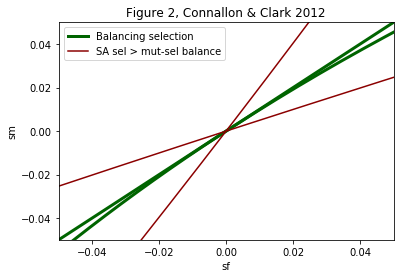

In [3]:
S=np.linspace(-0.4,0.4, 500)
#protected polymorphism
plt.plot(S,S, color="darkgreen", linewidth=3, label="Balancing selection")
plt.plot(S,S/(1+2*S), color="darkgreen", linewidth=3)
#SA sel vs mut-sel balance
plt.plot(S, S*(2+S), color="darkred", label="SA sel > mut-sel balance")
plt.plot(S*(2+S), S, color="darkred")
#plt.xlim(-0.4,0.4); plt.ylim(-0.4,0.4)
plt.xlim(-0.05,0.05); plt.ylim(-0.05,0.05)
plt.title("Figure 2, Connallon & Clark 2012")
plt.xlabel("sf"); plt.ylabel("sm")
plt.legend(loc=2);

[Note that minus signs are removed to be consistent with Connallon & Clar, 2012 - and inconsistent with how we define the model.]

### Allele frequency distribution at equilibrium


They indicate that the strength of balancing selection is $N_e(s_f^2+s_M^2)$ (why? Reference?), which is by definition way smaller than directional selection (N_es; Ne=10^6 corresponds to N_es=1000 and N_es^2=1 for Drosophila populations). Thus, most instances of selection, allele frequency spectra would be almost indistinguishable from those of a neutrally evolving locus. 

This is similar to the reparametrisation of the stationary distribution that Nick proposed: 

[We can approximate $\bar{W}^{2N_e}=[(1+s_fp)(1+s_mp)]^{N_e}\simeq exp\Big\{N\Big[(s_f+s_m)p - \frac{(s_f^2s_m^2)p^2}{2}\Big]\Big\}$. If $a=N(s_f+s_m)$ and $b=N(s_f^2+s_m^2)$ (and $\mu_0=\mu_1=\mu$), the allele frequency distribution can be expressed as

$$\Psi(p)=C [p(1-p)]^{4N_e\mu-1} exp\Big\{ap - \frac{bp^2}{2}\Big\}$$

Intuitively, $a$ can be understood as a measure of asymmetry of sex-specific selection and $b$ as a measure of selection strength. Results with this reparametrisation are in __Figure 1D__ (and expression as option 3 in ``distr_p``.]


They illustrate this in Figure 4 via allele frequency distribution at equilibrium (rather than average allele frequency ($\hat p$) or heterozygosity ($\hat H$) at equilibrium). I try to reproduce (a very simple version of) the figure:

__See "ASP_spring2019/ASP_Puixeu_HW3" for a more complete picture + simulations.__


/home/gpuixeus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars
/home/gpuixeus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in double_scalars


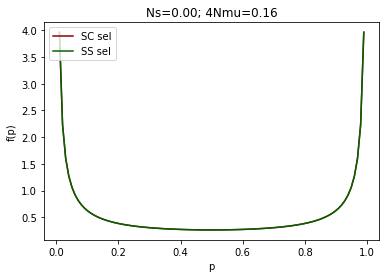

In [35]:
# selection, mutation, drift

def distr_p (p, sf, sm, N, expP, expQ):
    #return p**(expP)*(1-p)**(expQ)*((1+sf*p)*(1+sm*p))**(N)                     #option 1
    return p**(expP)*(1-p)**(expQ)*np.exp(N*np.log((1+sf*p)*(1+sm*p)))           #option 2
    #return p**(expP)*(1-p)**(expQ)*np.exp(N*((sf+sm)*p-(sf**2+sm**2)*p**2*0.5))  #option 3

def integrate(sf, sm, N, expP, expQ, fun=distr_p):
    return quad(fun, 0, 1, args=(sf, sm, N, expP, expQ))[0]

def ep(sf, sm, N, mu, fun=distr_p):
    return integrate(sf, sm, N, 4*N*mu, 4*N*mu-1, fun)/integrate(sf, sm, N, 4*N*mu-1, 4*N*mu-1, fun)     #2N. yes, this is right, the N doesn't change

def epq(sf, sm, N, mu, fun=distr_p):
    return integrate(sf, sm, N, 4*N*mu, 4*N*mu, fun)/integrate(sf, sm, N, 4*N*mu-1, 4*N*mu-1, fun)     #2N. yes, this is right, the N doesn't change
    #return integrate(sf, sm, N, 2*N*mu, 2*N*mu, fun)/integrate(sf, sm, N, 2*N*mu-1, 2*N*mu-1, fun)      #N

def point_p(p, sf, sm, N, Nmu4):
    return distr_p(p, sf, sm, N, Nmu4-1, Nmu4-1)/integrate(sf, sm, N, Nmu4-1, Nmu4-1, distr_p)   

#deterministic
def p_eq(sF,sM):
    p=-(sF+sM)/(2*sF*sM) #the factor of 2 is fine, it's an haploid model 
    return p
X
ps=np.linspace(0,1,100)
mu=1e-4
N=400
Nmu4=mu*N*4
s=0.02; sf=0.02; sm=0.02
s=0; sf=0; sm=0

#ALTERNATIVE (ASP_Puixeu_HW3)
#general
phat= lambda x: (x*(1-x))**(4*N*mu-1)*math.exp(2*N*s*x)
#normalisation constant
K=1/quad(phat,0,1)[0]
#stationary distribution from diffusion equation
plt.plot(ps,[K*phat(x) for x in ps],color="darkred", label="SC sel")

#sex-specific selection
phat= lambda x: (x*(1-x))**(Nmu4-1)*math.exp((N*np.log((1+sf*x)*(1+sm*x))))  #2N
K=1/quad(phat,0,1)[0]
plt.plot(ps,[K*phat(x) for x in ps],color="darkgreen", label="SS sel")
plt.legend(loc=2)
plt.xlabel("p")
plt.ylabel("f(p)")
plt.title("Ns=%.2f; 4Nmu=%.2f"%(N*s, 4*N*mu));

/home/gpuixeus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/home/gpuixeus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


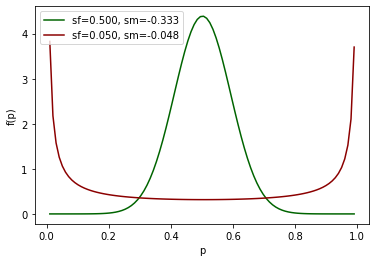

In [39]:
ps=np.linspace(0,1,100)
mu=1e-4
N=400
Nmu4=mu*N*4
s=0.02
sf=0.02
sm=0.02

sf=0.5;sm=-0.333
plt.plot(ps,[point_p(p,sf,sm,N,Nmu4) for p in ps],color="darkgreen", label="sf=%.3f, sm=%.3f"%(sf,sm))
sf=0.05;sm=-0.0477
plt.plot(ps,[point_p(p,sf,sm,N,Nmu4) for p in ps],color="darkred", label="sf=%.3f, sm=%.3f"%(sf,sm))
plt.legend(loc=2)
plt.xlabel("p")
plt.ylabel("f(p)");